Classification of BTC news with the pretrained model.

In [1]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
# Loading the model and tokenizer.
#model = BertForSequenceClassification.from_pretrained('kk08/CryptoBERT')
#tokenizer = BertTokenizer.from_pretrained('kk08/CryptoBERT')
model = BertForSequenceClassification.from_pretrained('pretrainedModel')
tokenizer = BertTokenizer.from_pretrained('pretrainedTokenizer')

C:\Users\asael\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\asael\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, truncation=True, max_length=512)

In [3]:
# Load the original CSV.
news_data = pd.read_csv('news_data.csv')
#print(news_data)

In [4]:
# Counting NaN values and filling with ''.
news_data['content'] = news_data['content'].fillna('')
news_data['text'] = news_data['title'] + ' ' + news_data['description'] + ' ' + news_data['content']
#print(news_data)

In [5]:
# Filter the rows starting from the row 738.
#filtered_news_data = news_data.iloc[738:].copy()
# Show filtered news.
#print("News starting from 738 row:")
#print(filtered_news_data)

In [6]:
# Clasify the sentiment of each filtered new and asign sentiment.
#filtered_news_data['sentiment'] = filtered_news_data['text'].apply(lambda x: classifier(x[:738])[0]['label'])
#filtered_news_data['rating'] = filtered_news_data['text'].apply(predict_sentiment)

In [7]:
# Show news with semntiment.
#print("Noticias a clasificar con su respectivo rating:")
#print(filtered_news_data[['text', 'sentiment']])

In [8]:
#print(filtered_news_data['text'][766])

In [9]:
# Statistical resume of the sentiment to see the sentiment distribution.
#rating_summary = filtered_news_data['sentiment'].describe()
#print("Resumen de los ratings:")
#print(rating_summary)

In [10]:
from datetime import datetime
from dateutil import parser

# Get the current date.
today = datetime.now().date()

# Convert pubDate to datatime format and filter by the current date.
# Ensure that pubDate is treated as a string before parsing.
news_data['pubDate'] = news_data['pubDate'].astype(str).apply(lambda x: parser.parse(x).date())

# Filter only the current news.
filtered_news_data = news_data[news_data['pubDate'] == today].copy()
print(filtered_news_data)

                 site                                              title  \
789          CoinDesk  Ether Favored in Crypto Rotation as Bitcoin Re...   
790          CoinDesk  Bitcoin Buying Plans Are Supercharging Stocks....   
791          CoinDesk  First Mover Americas: Bitcoin Regains $98K Aft...   
792          CoinDesk  Bitcoin Options Worth $9B Expire Friday, Trade...   
793          CoinDesk  MicroStrategy Is a Bitcoin Magnet Pulling in t...   
794          CoinDesk  Tether in Talks to Support Cantor Fitzgerald’s...   
795          CoinDesk  XRP, DOGE Lead Crypto Losses as Weekend Pullba...   
796          CoinDesk  Bitcoin May Be More Vulnerable to Negative New...   
797     CoinTelegraph   Rumble to spend up to $20M on Bitcoin in new ...   
798     CoinTelegraph   Bitcoin price slips to $93K as liquidations s...   
799     CoinTelegraph                     Sui to launch Bitcoin staking    
800     CoinTelegraph   Bitcoin sees new $90K BTC price target as 3% ...   
801     Coin

In [13]:
print(filtered_news_data['text'][829])

Michael Saylor’s MicroStrategy Buys 55,000 More Bitcoin  MicroStrategy, spearheaded by Michael Saylor, disclosed a $5.4B Bitcoin purchase, adding 55,000 BTC to its holdings. With a total of 386,700 BTC now acquired for $21.9B, the company remains one of the largest corporate investors in cryptocurrency. SEC filings reveal strategic funding via convertible notes.The postMichael Saylor’s MicroStrategy Buys 55,000 More Bitcoinappeared first onCryptonews.  MicroStrategy, led by Michael Saylor, expanded its Bitcoin holdings by purchasing 55,000 more coins between November 18 and November 24, according to an 8-K filing dated November 25.  This acquisition, worth $5.4 billion, marks the software firm’s largest purchase to date. MicroStrategy Increases Bitcoin Holdings With $5.4 Billion Purchase The Virginia-based company disclosed in its Monday filing with the United States Securities and Exchange Commission (SEC) that the purchase was funded through convertible note offerings and the sale of

In [12]:
# Apply the classifier to each text and store the probability in a new column.
filtered_news_data['label'] = filtered_news_data['text'].apply(lambda x: classifier(x)[0]['label'])

# Mapping targets to understand better the labels.
label_mapping = {'LABEL_0': 'Negative', 'LABEL_1': 'Positive'}
filtered_news_data['sentiment'] = filtered_news_data['label'].map(label_mapping)

# Show news with sentiment values.
print("Noticias clasificadas de la fecha actual con su respectivo sentimiento:")
print(filtered_news_data[['text', 'label', 'sentiment']])

Noticias clasificadas de la fecha actual con su respectivo sentimiento:
                                                  text    label sentiment
789  Ether Favored in Crypto Rotation as Bitcoin Re...  LABEL_1  Positive
790  Bitcoin Buying Plans Are Supercharging Stocks....  LABEL_1  Positive
791  First Mover Americas: Bitcoin Regains $98K Aft...  LABEL_1  Positive
792  Bitcoin Options Worth $9B Expire Friday, Trade...  LABEL_1  Positive
793  MicroStrategy Is a Bitcoin Magnet Pulling in t...  LABEL_1  Positive
794  Tether in Talks to Support Cantor Fitzgerald’s...  LABEL_0  Negative
795  XRP, DOGE Lead Crypto Losses as Weekend Pullba...  LABEL_0  Negative
796  Bitcoin May Be More Vulnerable to Negative New...  LABEL_0  Negative
797   Rumble to spend up to $20M on Bitcoin in new ...  LABEL_1  Positive
798   Bitcoin price slips to $93K as liquidations s...  LABEL_0  Negative
799   Sui to launch Bitcoin staking  Starting in De...  LABEL_1  Positive
800   Bitcoin sees new $90K BTC price ta

In [14]:
"""# Calcular el promedio de las puntuaciones
average_score = filtered_news_data['score'].mean()

# Calcular el porcentaje de noticias positivas
positive_count = (filtered_news_data['label'] == 'LABEL_1').sum()
negative_count = (filtered_news_data['label'] == 'LABEL_0').sum()
total_count = len(filtered_news_data)

positive_percentage = (positive_count / total_count) * 100 if total_count > 0 else 0
negative_percentage = (negative_count / total_count) * 100 if total_count > 0 else 0

# Resultados
print("Promedio de probabilidad de sentimiento:", average_score)
print("Porcentaje de noticias positivas:", positive_percentage)
print("Porcentaje de noticias negativas:", negative_percentage)

# Guardar el resultado en un nuevo archivo CSV, si lo deseas
filtered_news_data.to_csv('classified_news_today_with_probabilities.csv', index=False)

# Puedes almacenar las métricas en un diccionario o DataFrame para combinarlas con otro análisis
sentiment_analysis_summary = {
    "average_score": average_score,
    "positive_percentage": positive_percentage,
    "negative_percentage": negative_percentage
}

# Convertir el resumen a un DataFrame si necesitas
summary_df = pd.DataFrame([sentiment_analysis_summary])
summary_df.to_csv('sentiment_analysis_summary.csv', index=False)
"""

'# Calcular el promedio de las puntuaciones\naverage_score = filtered_news_data[\'score\'].mean()\n\n# Calcular el porcentaje de noticias positivas\npositive_count = (filtered_news_data[\'label\'] == \'LABEL_1\').sum()\nnegative_count = (filtered_news_data[\'label\'] == \'LABEL_0\').sum()\ntotal_count = len(filtered_news_data)\n\npositive_percentage = (positive_count / total_count) * 100 if total_count > 0 else 0\nnegative_percentage = (negative_count / total_count) * 100 if total_count > 0 else 0\n\n# Resultados\nprint("Promedio de probabilidad de sentimiento:", average_score)\nprint("Porcentaje de noticias positivas:", positive_percentage)\nprint("Porcentaje de noticias negativas:", negative_percentage)\n\n# Guardar el resultado en un nuevo archivo CSV, si lo deseas\nfiltered_news_data.to_csv(\'classified_news_today_with_probabilities.csv\', index=False)\n\n# Puedes almacenar las métricas en un diccionario o DataFrame para combinarlas con otro análisis\nsentiment_analysis_summary = {

In [15]:
sentiment_summary = filtered_news_data['sentiment'].value_counts()
print("Resumen de Sentimientos:")
print(sentiment_summary)

Resumen de Sentimientos:
sentiment
Positive    18
Negative     9
Name: count, dtype: int64


In [16]:
# Sentiment porcentage.
positive_percentage = (sentiment_summary['Positive'] / sentiment_summary.sum()) * 100
negative_percentage = (sentiment_summary['Negative'] / sentiment_summary.sum()) * 100
print(f"Tendencia del Sentimiento:\nPositivo: {positive_percentage:.2f}%\nNegativo: {negative_percentage:.2f}%")

Tendencia del Sentimiento:
Positivo: 66.67%
Negativo: 33.33%


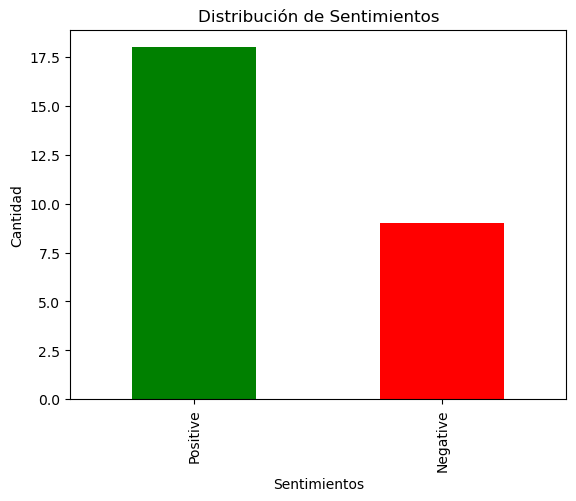

In [17]:
import matplotlib.pyplot as plt

# Show the results.
sentiment_summary.plot(kind='bar', color=['green', 'red'], title='Distribución de Sentimientos')
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad')
plt.show()

In [18]:
# Get the highest porcentage of sentiment.
if not sentiment_summary.empty:
    predominant_sentiment = sentiment_summary.idxmax()
    predominant_percentage = (sentiment_summary[predominant_sentiment] / sentiment_summary.sum()) * 100
    print(f"El sentimiento predominante es: {predominant_sentiment.upper()} ({predominant_percentage:.2f}%)")
else:
    print("No hay suficientes datos para analizar el sentimiento.")

El sentimiento predominante es: POSITIVE (66.67%)


In [19]:
import json

# Store the predominat sentiment in JSON file.
if not sentiment_summary.empty:
    result = {
        "sentiment": predominant_sentiment,
        "percentage": round(predominant_percentage, 2)
    }
    with open('sentiment_result.json', 'w') as json_file:
        json.dump(result, json_file)
    print("Resultado exportado a 'sentiment_result.json'.")
else:
    print("No hay suficientes datos para exportar el resultado.")


Resultado exportado a 'sentiment_result.json'.
